In [1]:
# -*- coding:utf-8 -*-
import urllib.request
import xlwt
import re
import urllib.parse
import time
header={
    'Host':'search.51job.com',
    'Upgrade-Insecure-Requests':'1',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}
def getfront(page,item):       #page是页数，item是输入的字符串
     result = urllib.parse.quote(item)					#先把字符串转成十六进制编码
     ur1 = result+',2,'+ str(page)+'.html'
     ur2 = 'https://search.51job.com/list/000000,000000,0000,00,9,99,'
     res = ur2+ur1    #拼接网址
     a = urllib.request.urlopen(res)
     html = a.read().decode('gbk')      # 读取源代码并转为unicode
     html = html.replace('\\','')       # 将用于转义的"\"替换为空
     html = html.replace('[', '')
     html = html.replace(']', '')
     #print(html)
     return html

def getInformation(html):
    reg = re.compile(r'\{"type":"engine_search_result","jt":"0".*?"job_href":"(.*?)","job_name":"(.*?)".*?"company_href":"(.*?)","company_name":"(.*?)","providesalary_text":"(.*?)".*?"updatedate":"(.*?)".*?,'
                     r'"companytype_text":"(.*?)".*?"jobwelf":"(.*?)".*?"attribute_text":"(.*?)","(.*?)","(.*?)","(.*?)","companysize_text":"(.*?)","companyind_text":"(.*?)","adid":""},',re.S)#匹配换行符
    items=re.findall(reg,html)
    print(items)
    return items

#新建表格空间
excel1 = xlwt.Workbook()
# 设置单元格格式
sheet1 = excel1.add_sheet('Job', cell_overwrite_ok=True)
sheet1.write(0, 0, '序号')
sheet1.write(0, 1, '职位')
sheet1.write(0, 2, '公司名称')
sheet1.write(0, 3, '公司地点')
sheet1.write(0, 4, '公司性质')
sheet1.write(0, 5, '薪资')
sheet1.write(0, 6, '学历要求')
sheet1.write(0, 7, '工作经验')
sheet1.write(0, 8, '公司规模')
#sheet1.write(0, 9, '公司类型')
sheet1.write(0, 9,'公司福利')
sheet1.write(0, 10,'发布时间')
number = 1
item = input()

for j in range(1,5):   #页数自己随便改
    try:
        print("正在爬取第"+str(j)+"页数据...")
        html = getfront(j,item)      #调用获取网页原码
        for i in getInformation(html):
            try:
                #url1 = i[1]          #职位网址
                #res1 = urllib.request.urlopen(url1).read().decode('gbk')
                #company = re.findall(re.compile(r'<div class="com_tag">.*?<p class="at" title="(.*?)"><span class="i_flag">.*?<p class="at" title="(.*?)">.*?<p class="at" title="(.*?)">.*?',re.S),res1)
                #job_need = re.findall(re.compile(r'<p class="msg ltype".*?>.*?&nbsp;&nbsp;<span>|</span>&nbsp;&nbsp;(.*?)&nbsp;&nbsp;<span>|</span>&nbsp;&nbsp;(.*?)&nbsp;&nbsp;<span>|</span>&nbsp;&nbsp;.*?</p>',re.S),res1)
                #welfare = re.findall(re.compile(r'<span class="sp4">(.*?)</span>',re.S),res1)
                #print(i[0],i[2],i[4],i[5],company[0][0],job_need[2][0],job_need[1][0],company[0][1],company[0][2],welfare,i[6])
                sheet1.write(number,0,number)
                sheet1.write(number,1,i[1])
                sheet1.write(number,2,i[3])
                sheet1.write(number,3,i[8])
                sheet1.write(number,4,i[6])
                sheet1.write(number,5,i[4])
                sheet1.write(number,6,i[10])
                sheet1.write(number,7,i[9])
                sheet1.write(number,8,i[12])
                #sheet1.write(number,9,i[7])
                sheet1.write(number,9,i[7])
                sheet1.write(number,10,i[5])
                number+=1
                excel1.save("51job.xls")
                time.sleep(0.3) #休息间隔，避免爬取海量数据时被误判为攻击，IP遭到封禁
            except:
                pass
    except:
        pass

 2


正在爬取第1页数据...
[('https://jobs.51job.com/shanghai-mhq/128562138.html?s=01&t=0', '急聘项目经理包吃住1.2w起', 'https://jobs.51job.com/all/co3493499.html', '上海捞派餐饮管理有限公司', '1.2-1.5万/月', '01-24', '民营公司', '节日福利 做六休一 包吃住 年终分红 带薪年假 保销健康证', '上海-闵行区', '3-4年经验', '大专', '招10人', '10000人以上', '酒店/旅游'), ('https://jobs.51job.com/beijing-dcq/127443542.html?s=01&t=0', '分析助理2', 'https://jobs.51job.com/all/co6191417.html', '北京晹昇科技有限公司', '0.8-1.2万/月', '01-24', '民营公司', '做五休二 五险一金 全勤奖 节日福利 周末双休 带薪年假 交通补贴', '北京-东城区', '1年经验', '大专', '招4人', '150-500人', '互联网/电子商务'), ('https://jobs.51job.com/shenzhen-ftq/106597216.html?s=01&t=0', 'B2B外贸业务员', 'https://jobs.51job.com/all/co3218246.html', '深圳市永昌进出口有限公司', '0.6-1.2万/月', '01-24', '民营公司', '员工旅游 年终奖金 绩效奖金 专业培训 高提成 带薪年假 节日福利 五险', '深圳-福田区', '2年经验', '本科', '招2人', '少于50人', '贸易/进出口'), ('https://jobs.51job.com/kunming-gdq/114724435.html?s=01&t=0', '大区销售经理（1O一2O万年薪）', 'https://jobs.51job.com/all/co5089172.html', '云南厦宇经贸有限公司', '10-15万/年', '01-24', '民营公司', '', '昆明-官渡区', '2年经验', '大专', '招若干人', '少

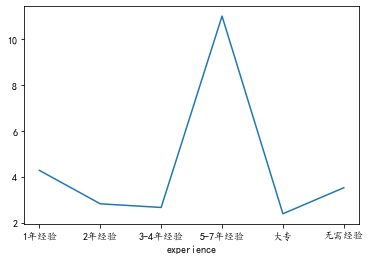

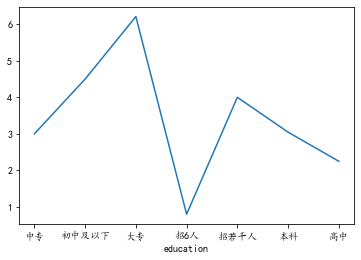

In [2]:
#coding:utf-8
import pandas as pd
import re

data = pd.read_excel(r'51job.xls',sheet_name='Job')
result = pd.DataFrame(data)

a = result.dropna(axis=0,how='any')
pd.set_option('display.max_rows',None)     #输出全部行，不省略

b = u'数据'
number = 1
li = a['职位']
for i in range(0,len(li)):
    try:
        if b in li[i]:
            #print(number,li[i])
            number+=1
        else:
            a = a.drop(i,axis=0)  #删除整行
    except:
        pass

b2 = '人'
li2 = a['学历要求']
for i in range(0,len(li2)):
    try:
        if b2 in li2[i]:
            # print(number,li2[i])
            number += 1
            a = a.drop(i, axis=0)
    except:
        pass

b3 =u'万/年'
b4 =u'千/月'
li3 = a['薪资']
#注释部分的print都是为了调试用的
for i in range(0,len(li3)):
    try:
        if b3 in li3[i]:
            x = re.findall(r'\d*\.?\d+',li3[i])
            #print(x)
            min_ = format(float(x[0])/12,'.2f')              #转换成浮点型并保留两位小数
            max_ = format(float(x[1])/12,'.2f')
            li3[i][1] = min_+'-'+max_+u'万/月'
        if b4 in li3[i]:
            x = re.findall(r'\d*\.?\d+',li3[i])
            #print(x)
            #input()
            min_ = format(float(x[0])/10,'.2f')
            max_ = format(float(x[1])/10,'.2f')
            li3[i][1] = str(min_+'-'+max_+'万/月')
        print(i,li3[i])

    except:
        pass
a.to_excel('51job2.xls', sheet_name='Job', index=False)
#############################################################################################
import pandas as pd
import re
from pyecharts import Funnel,Pie,Geo
import matplotlib.pyplot as plt

file = pd.read_excel(r'51job2.xls',sheet_name='Job')
f = pd.DataFrame(file)
pd.set_option('display.max_rows',None)

add = f['公司地点']
sly = f['薪资']
edu = f['学历要求']
exp = f['工作经验']
address =[]
salary = []
education = []
experience = []
for i in range(0,len(f)):
    try:
        a = add[i].split('-')
        address.append(a[0])
        #print(address[i])
        s = re.findall(r'\d*\.?\d+',sly[i])
        s1= float(s[0])
        s2 =float(s[1])
        salary.append([s1,s2])
        #print(salary[i])
        education.append(edu[i])
        #print(education[i])
        experience.append(exp[i])
        #print(experience[i])
    except:
        pass

min_s=[]         #定义存放最低薪资的列表
max_s=[]         #定义存放最高薪资的列表
for i in range(0,len(experience)):
    min_s.append(salary[i][0])
    max_s.append(salary[i][0])
#matplotlib模块如果显示不了中文字符串可以用以下代码。
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

my_df = pd.DataFrame({'experience':experience, 'min_salay' : min_s, 'max_salay' : max_s})				#关联工作经验与薪资
data1 = my_df.groupby('experience').mean()['min_salay'].plot(kind='line')
plt.show()
my_df2 = pd.DataFrame({'education':education, 'min_salay' : min_s, 'max_salay' : max_s})				#关联学历与薪资
data2 = my_df2.groupby('education').mean()['min_salay'].plot(kind='line')
plt.show()

def get_edu(list):
    education2 = {}
    for i in set(list):
        education2[i] = list.count(i)
    return education2
dir1 = get_edu(education)
# print(dir1)

attr= dir1.keys()
value = dir1.values()
pie = Pie("学历要求")
pie.add("", attr, value, center=[50, 50], is_random=False, radius=[30, 75], rosetype='radius',
        is_legend_show=False, is_label_show=True,legend_orient='vertical')
pie.render('学历要求玫瑰图.html')

def get_address(list):
    address2 = {}
    for i in set(list):
        address2[i] = list.count(i)
    address2.pop('异地招聘')
    # 有些地名可能不合法或者地图包里没有可以自行删除，之前以下名称都会报错，现在好像更新了
    #address2.pop('山东')
    #address2.pop('怒江')
    #address2.pop('池州')
    return address2
dir2 = get_address(address)
#print(dir2)

geo = Geo("大数据人才需求分布图", title_color="#2E2E2E",
          title_text_size=24,title_top=20,title_pos="center", width=1300,height=600)
attr2 = dir2.keys()
value2 = dir2.values()
geo.add("",attr2, value2, type="effectScatter", is_random=True, visual_range=[0, 1000], maptype='china',symbol_size=8, effect_scale=5, is_visualmap=True)
geo.render('大数据城市需求分布图.html')

def get_experience(list):
    experience2 = {}
    for i in set(list):
         experience2[i] = list.count(i)
    return experience2
dir3 = get_experience(experience)
#print(dir3)

attr3= dir3.keys()
value3 = dir3.values()
funnel = Funnel("工作经验漏斗图",title_pos='center')
funnel.add("", attr3, value3,is_label_show=True,label_pos="inside", label_text_color="#fff",legend_orient='vertical',legend_pos='left')
funnel.render('工作经验要求漏斗图.html')